Ejercicio   

In [2]:
import numpy as np
import pandas as pd

# Matriz de confusión proporcionada
conf_matrix = np.array([[162, 4],
                        [11, 22]])

# Extraer valores de la matriz de confusión
TN, FP, FN, TP = conf_matrix.ravel()

# --- Métricas para la Clase 0 (Negativa) ---
precision_0 = TN / (TN + FN)
recall_0 = TN / (TN + FP)
f1_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0)
specificity_0 = TP / (TP + FN)
fpr_0 = FN / (FN + TP)

# --- Métricas para la Clase 1 (Positiva) ---
precision_1 = TP / (TP + FP)
recall_1 = TP / (TP + FN)
f1_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1)
accuracy_1 = (TP + TN) / (TP + TN + FP + FN)
specificity_1 = TN / (TN + FP)
fpr_1 = FP / (FP + TN)

# Crear un dataframe para presentar las métricas en una tabla
metrics_data = {
    'Métrica': ['Precisión (Precision)', 'Sencibilidad (Recall)', 'F1-Score',  'Exactitud(Accuracy)'],
    'Clase 0 (Negativa)': [precision_0, recall_0, f1_0, accuracy_1],  # Accuracy es el mismo para ambas clases
    'Clase 1 (Positiva)': [precision_1, recall_1, f1_1, accuracy_1]

}

df_metrics = pd.DataFrame(metrics_data)

# Mostrar la tabla con las métricas
print(df_metrics)


                 Métrica  Clase 0 (Negativa)  Clase 1 (Positiva)
0  Precisión (Precision)            0.936416            0.846154
1  Sencibilidad (Recall)            0.975904            0.666667
2               F1-Score            0.955752            0.745763
3    Exactitud(Accuracy)            0.924623            0.924623


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
archivo = '/content/drive/MyDrive/diabetes.csv'

In [63]:
df = pd.read_csv(archivo)

In [7]:

#Visualización de DataFrame previa limpieza

df.head(25)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:

# Presencia de duplicados
df.duplicated().sum()

0

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:

# Visualización de valores de las columnas.Método value_count

df['Insulin'].value_counts() # Muchos valores cero 374

,count
Insulin,
0,374
105,11
130,9
140,9
120,8
...,...
73,1
171,1
255,1


In [12]:

df['SkinThickness'].value_counts() # Muchos valores cero 227

,count
SkinThickness,
0,227
32,31
30,27
27,23
23,22
33,20
28,20
18,20
31,19


In [13]:
df['BMI'].value_counts() # 11 valores ceros.

,count
BMI,
32.0,13
31.6,12
31.2,12
0.0,11
32.4,10
...,...
36.7,1
41.8,1
42.6,1


In [14]:
df['BloodPressure'].value_counts() # 35 valores cero. Existe valores muy bajos dado que la medición es mmHg(milimetro de Mercurio)
                                  # Son varios los valores bajo 60 mmHg. Puede deberse a la toma de medida en descompensación. En general la
                                  # presión arterial diastólica está alrededor de los 80mmHg


,count
BloodPressure,
70,57
74,52
78,45
68,45
72,44
64,43
80,40
76,39
60,37


In [15]:
(df['Glucose']==0).sum() # 5 valores cero

5

In [16]:

corr= df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


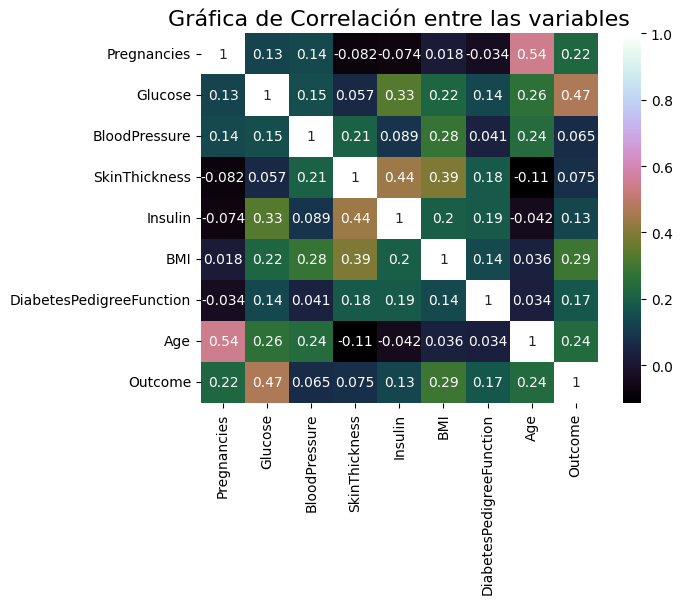

In [17]:
sns.heatmap(corr, annot=True,cmap="cubehelix")
plt.title('Gráfica de Correlación entre las variables', size=16)
plt.show()


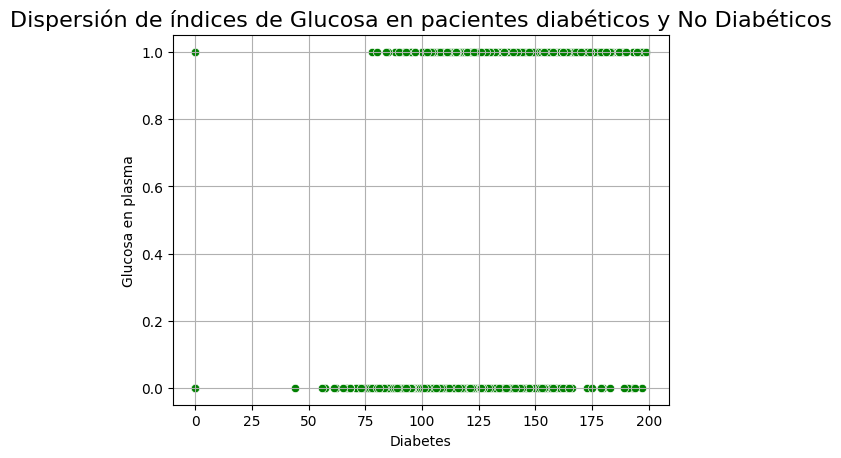

In [18]:
sns.scatterplot(x = df['Glucose'],
                y = df['Outcome'],
                color = "green")

plt.title('Dispersión de índices de Glucosa en pacientes diabéticos y No Diabéticos', size =16,color='black')
plt.xlabel('Diabetes')
plt.ylabel('Glucosa en plasma')
plt.grid()
plt.show()

Preprocesamiento

In [19]:
# Importar Librerías

from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
set_config(display="diagram")

In [20]:
y = df['Outcome']
X = df.drop(columns=['Outcome','SkinThickness','Insulin'])

In [21]:
# Visualización
y [0:5]


,Outcome
0,1
1,0
2,1
3,0
4,1


In [22]:
X.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,33.6,0.627,50
1,1,85,66,26.6,0.351,31
2,8,183,64,23.3,0.672,32
3,1,89,66,28.1,0.167,21
4,0,137,40,43.1,2.288,33


Determinación de tipos de columnas

Numéricas: Glucose,BloodPressure, BMI, DiabetesPedigreeFunction, Age,Pregnancies
Categóricas: No existen
Ordinal : No hay
La categoría Pregnancies pudiesen tomar como ordinal, pero para el diagnóstico de embarazo, requiere la presencia de embarazo o la no presencia de embarazo, no importa la cantidad. La categoría Age tampoco distingue de orden, una poersona puede tener diabetes como 20 años o con 70 años. Por lo tanto todas las categorías son numéricas.

In [23]:

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 36.1 KB


In [24]:
#  Preprocesamiento por dtype para mantener el rango de la edad y de los embarazos

int_selector = make_column_selector(dtype_include='int')
float_selector = make_column_selector(dtype_include='float')

standard_scaler = StandardScaler()

imputer_int= SimpleImputer(strategy='median')
imputer_float= SimpleImputer(strategy='mean')

col_transformer = make_column_transformer(
    (make_pipeline(imputer_int, standard_scaler), int_selector),
    (make_pipeline(imputer_float, standard_scaler), float_selector),
    remainder='passthrough'
)
pipeline=make_pipeline(col_transformer)

pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7aa705df8a30>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7aa73e6b7790>)]))])

In [25]:
pipeline.fit(X) # Entrenamiento
X_processed = pipeline.transform(X)


In [26]:

X_procesado = pd.DataFrame(X_processed, columns=pipeline.get_feature_names_out())

In [27]:
X_procesado.head() #Visualización Data listo para procesar

,pipeline-1__Pregnancies,pipeline-1__Glucose,pipeline-1__BloodPressure,pipeline-1__Age,pipeline-2__BMI,pipeline-2__DiabetesPedigreeFunction
0,0.639947,0.848324,0.149641,1.425995,0.204013,0.468492
1,-0.844885,-1.123396,-0.160546,-0.190672,-0.684422,-0.365061
2,1.233880,1.943724,-0.263941,-0.105584,-1.103255,0.604397
3,-0.844885,-0.998208,-0.160546,-1.041549,-0.494043,-0.920763
4,-1.141852,0.504055,-1.504687,-0.020496,1.409746,5.484909


In [28]:
# Aplicar train, test,split

X_train,X_test,y_train,y_test = train_test_split(X_procesado,y, random_state= 10 )

Modelos de Clasificación
Puesto que la obtención del Outcome es si (1) o no (0) refernte a la presencia o no de la enfermedad, es un problema de clasificación

In [29]:

# Importar librerías

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


Modelo de Árbol de Clasificación

In [30]:
cl_arbol = DecisionTreeClassifier(random_state=10)
cl_arbol.fit(X_train, y_train)

train_preds = cl_arbol.predict(X_train)
test_preds = cl_arbol.predict(X_test)

train_score = accuracy_score(y_train, train_preds)
test_score = accuracy_score(y_test, test_preds)
print (f'El accuracy de entrenamiento es {train_score:.3f}.')
print (f'El accuracy de testeo es {test_score:.3f}.')

El accuracy de entrenamiento es 1.000.
El accuracy de testeo es 0.677.


In [31]:
print("Reporte de clasificación para Arboles de decisión \n")
print(classification_report(y_test,test_preds))

Reporte de clasificación para Arboles de decisión 

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       121
           1       0.57      0.51      0.54        71

    accuracy                           0.68       192
   macro avg       0.65      0.64      0.64       192
weighted avg       0.67      0.68      0.67       192



El modelo esta evidentemente sobreajustado. Su accuracy es del 61%, con poca precisión y sensibilidad a las muestras positivas (de 48%).

In [34]:
cl_arbol.get_depth() # Arbol posee una profundidad natual de 17

14

In [35]:
# Se probará un rango de Profundidad entre 2 a 40 para evaluar R2

max_depth_range= list(range(2,40))

r2 =[]

for depth in max_depth_range:
  cl_arbol = DecisionTreeClassifier(max_depth= depth,
                                   random_state = 10)
  cl_arbol.fit(X_train, y_train)
  score = cl_arbol.score(X_test,y_test)
  r2.append(score)

Text(0, 0.5, 'R2')

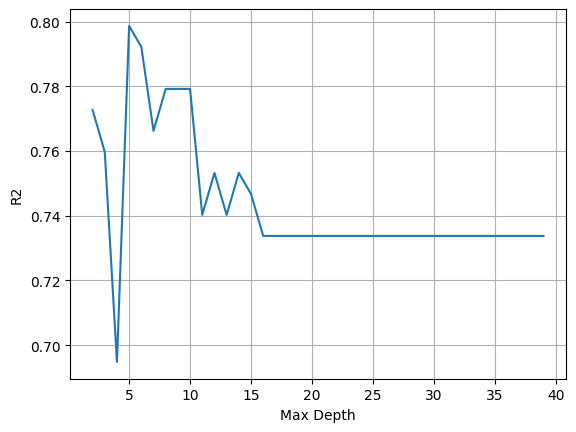

In [36]:
# Visualizar max depth

plt.plot(max_depth_range,r2)
plt.xlabel('Max Depth')
plt.grid()
plt.ylabel('R2')

a gráfica muestra un óptimo alrededor de una profundidad de 2

In [37]:

#Evaluar modelo con profundidad 2
cl_arbol_2 = DecisionTreeClassifier(random_state=10, max_depth =2)
cl_arbol_2.fit(X_train, y_train)

train_preds_2 = cl_arbol_2.predict(X_train)
test_preds_2 = cl_arbol_2.predict(X_test)

train_score_2 = accuracy_score(y_train, train_preds_2)
test_score_2 = accuracy_score(y_test, test_preds_2)
print (f'El accuracy de entrenamiento es {train_score_2:.3f}.')
print (f'El accuracy de testeo es {test_score_2:.3f}.')

El accuracy de entrenamiento es 0.772.
El accuracy de testeo es 0.773.


In [38]:

print("Reporte de clasificación para Arboles de decisión \n")
print(classification_report(y_test,test_preds_2))

Reporte de clasificación para Arboles de decisión 

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        99
           1       0.73      0.58      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



El modelo se ajusta mucho más, pero es bajo en rendimiento tanto de entrenamiento como de testeo

El modelo sigue siendo deficiente, pero aumenta su precisión y sensibilidad con las muestras negativas (75% precisión, y 83% de sensibilidad) y tambien aumenta sus porcentajes para las muestras positivas del 48% al 65% en presición y del 48% al 52% en sensibilidad.

 **Modelo Regresión Logística**

In [40]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

train_preds_rl = logreg.predict(X_train)
test_preds_rl= logreg.predict(X_test)

train_score_rl = accuracy_score(y_train, train_preds_rl)
test_score_rl = accuracy_score(y_test, test_preds_rl)

print (f'El accuracy de entrenamiento es {train_score_rl:.3f}.')
print (f'El accuracy de testeo es {test_score_rl:.3f}.')

El accuracy de entrenamiento es 0.767.
El accuracy de testeo es 0.740.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
print("Reporte de clasificación para Regresión Logística \n")
print(classification_report(y_test,test_preds_rl))


Reporte de clasificación para Regresión Logística 

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



El modelo no está sobreajustado.Pero su rendimiento es ineficiente:Posee poca sensibilidad con respecto a las muestras positivas

In [42]:
# Ajuste por  Escalamiento L1
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_rl = []
test_score_rl = []

for c in c_values:

  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(standard_scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)

  train_score_rl.append(log_reg_pipe.score(X_train, y_train))
  test_score_rl.append(log_reg_pipe.score(X_test, y_test))

{0.0001: 0.6428571428571429,
 0.001: 0.6428571428571429,
 0.01: 0.7272727272727273,
 0.1: 0.7597402597402597,
 1: 0.7597402597402597,
 10: 0.7532467532467533,
 100: 0.7532467532467533,
 1000: 0.7532467532467533}

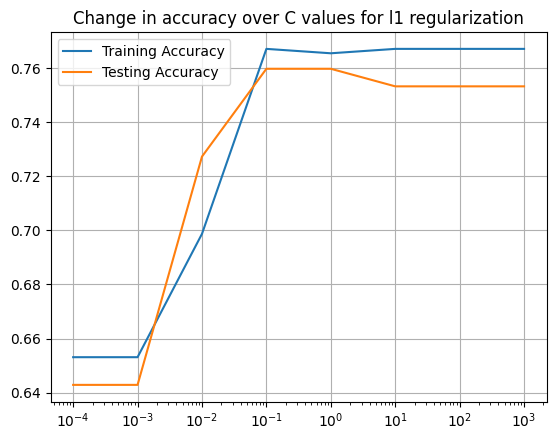

In [43]:
#Visualización L1
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_score_rl, label='Training Accuracy')
ax.plot(c_values, test_score_rl, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
ax.grid()

#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_score_rl)}

El modelo con un regularización L1 mantiene su ajuste moderado. Su óptimo lo alcanza de 0.1 en adelante donde se mantiene con un accuracy de 68,75%

Con el ajuste Regularización L2, el modelo mantiene un ajuste bastante constante con los cambios, y obtiene su óptimo con 0.1, donde su accuracy es de 69,27%

In [44]:
#Ajuste Escalamiento L2
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_rl2 = []
test_score_rl2 = []

for c in c_values:

  log_regs = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipes = make_pipeline(standard_scaler, log_regs)
  log_reg_pipes.fit(X_train, y_train)

  train_score_rl2.append(log_reg_pipes.score(X_train, y_train))
  test_score_rl2.append(log_reg_pipes.score(X_test, y_test))

{0.0001: 0.7207792207792207,
 0.001: 0.7207792207792207,
 0.01: 0.7272727272727273,
 0.1: 0.7402597402597403,
 1: 0.7467532467532467,
 10: 0.7532467532467533,
 100: 0.7532467532467533,
 1000: 0.7532467532467533}

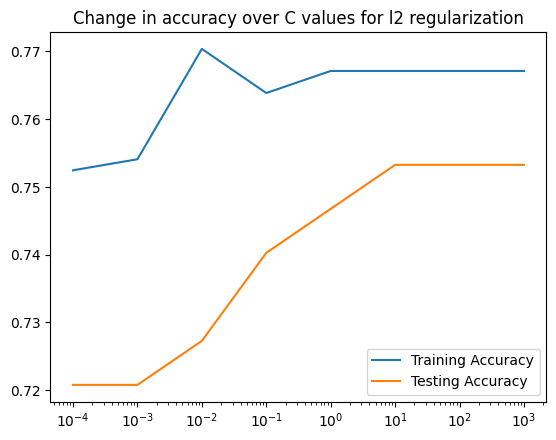

In [45]:
#Visualización L2
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_score_rl2, label='Training Accuracy')
ax.plot(c_values, test_score_rl2, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()

ax.set_xscale('log')

{c:score for c, score in zip(c_values, test_score_rl2)}


ejercicio ROC CURVE


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


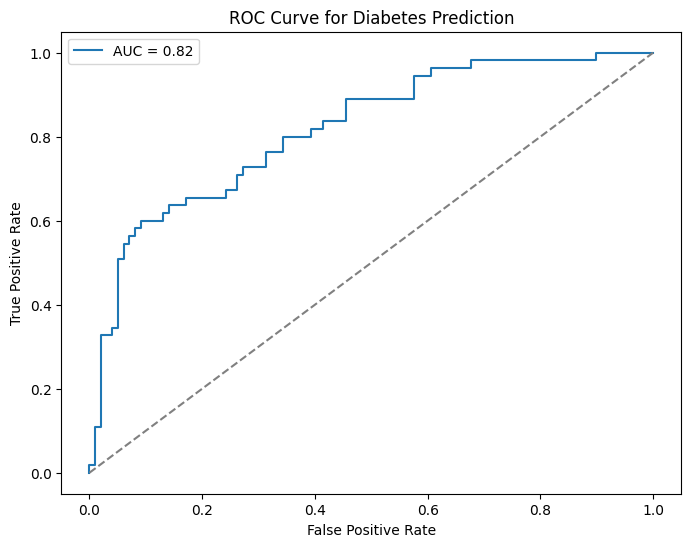

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 3. Predict probabilities for the test set
y_probs = model.predict_proba(X_test)[:, 1]

# 4. Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# 5. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.legend()
plt.show()

matrix de confusion


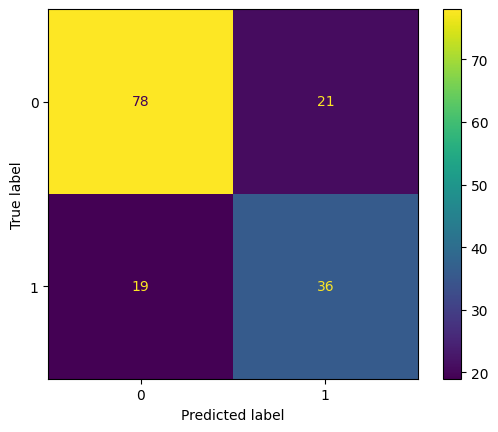

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming 'logreg' is your fitted LogisticRegression model and 'X_test', 'y_test' are your test data
y_pred = logreg.predict(X_test) # Get model predictions for the test set

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [47]:
from sklearn.metrics import classification_report

# Assuming 'logreg' is your fitted LogisticRegression model and 'X_test', 'y_test' are your test data
y_pred = logreg.predict(X_test)  # Get model predictions for the test set

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



In [56]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


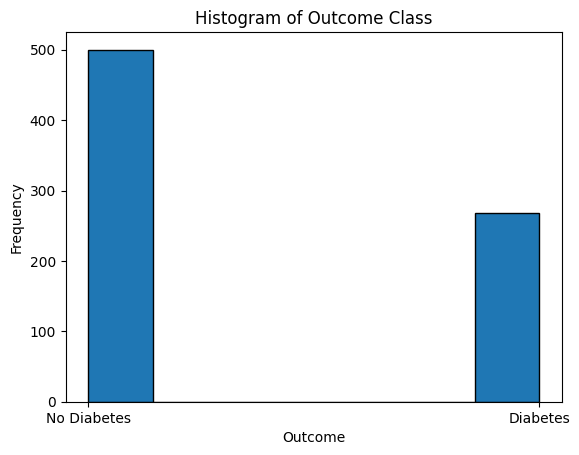

In [53]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.hist(df['Outcome'], bins=7, edgecolor='black')  # Adjust 'bins' as needed
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Histogram of Outcome Class')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])  # Customize x-axis labels
plt.show()

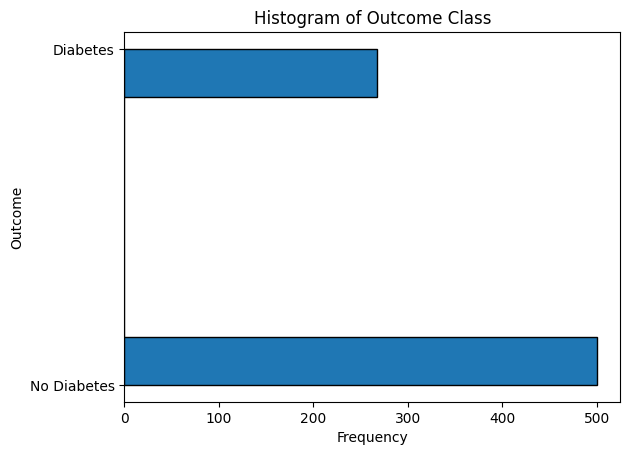

In [52]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.hist(df['Outcome'], bins=7, edgecolor='black', orientation='horizontal')
plt.ylabel('Outcome')  # Swapped from xlabel
plt.xlabel('Frequency') # Swapped from ylabel
plt.title('Histogram of Outcome Class')
plt.yticks([0, 1], ['No Diabetes', 'Diabetes'])  # Swapped from xticks
plt.show()

In [54]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Perform class balancing using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)  # Assuming X and y are your features and target

# 2. Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 3. Create and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = logreg.predict(X_test)

# 5. Calculate and print the metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.765
Precision: 0.7596153846153846
Recall: 0.7821782178217822
F1-score: 0.7707317073170732

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76        99
           1       0.76      0.78      0.77       101

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



In [57]:
# Assuming 'df' is your DataFrame
smaller_df = df.sample(n=100, random_state=42)  # Get 100 random samples

# Or, to get a percentage of the data:
smaller_df = df.sample(frac=0.2, random_state=42)  # Get 20% of the data

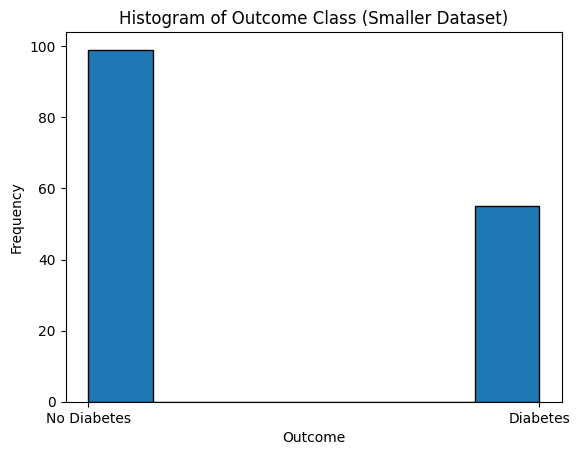

In [62]:
import matplotlib.pyplot as plt

plt.hist(smaller_df['Outcome'], bins=7, edgecolor='black')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Histogram of Outcome Class (Smaller Dataset)')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 1. Separate features (X) and target (y)
y = smaller_df['Outcome']
X = smaller_df.drop(columns=['Outcome'])

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Predict on the test set
y_pred = model.predict(X_test)

# 5. Get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.94      0.77        16
           1       0.88      0.47      0.61        15

    accuracy                           0.71        31
   macro avg       0.76      0.70      0.69        31
weighted avg       0.76      0.71      0.69        31



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


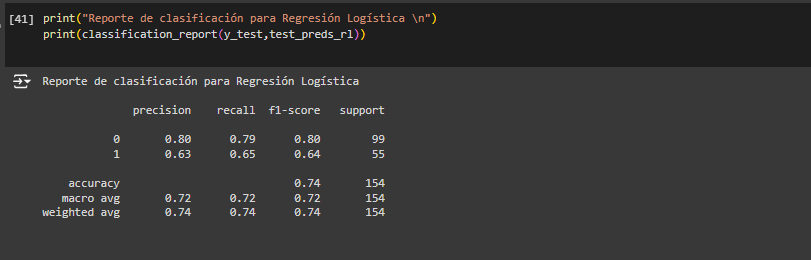